In [202]:
import os
import csv
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation
from scipy.integrate import trapz

In [203]:
%store -r acc_dict
person_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13", "p14", "p15", "p16", "p17", "p18"]

In [204]:
sections = pd.read_excel('sections.xlsx')
start = np.array(sections['from_imu']).astype(int)
end = np.array(sections['to_imu']).astype(int)

section_dict = {}
for i, person_name in enumerate(person_names):
    total_time = acc_dict[person_name]['time']
    section_dict[person_name] = {'start': start[i], 'end': end[i], 'time_1': np.arange(1, start[i]), 'time_2': np.arange(start[i], end[i]), 'time_3': np.arange(end[i], len(total_time) - 1)}

In [206]:
for person_name in acc_dict:
    acc_dataset = acc_dict[person_name]
    start = section_dict[person_name]['start']
    end = section_dict[person_name]['end']

    acc_dataset['section_1_x_jerk_normalized_global'] = acc_dataset['acc_x_derivative_normalized_global'][0:start]
    acc_dataset['section_2_x_jerk_normalized_global'] = acc_dataset['acc_x_derivative_normalized_global'][start:end]
    acc_dataset['section_3_x_jerk_normalized_global'] = acc_dataset['acc_x_derivative_normalized_global'][end:-1]
    acc_dataset['section_1_y_jerk_normalized_global'] = acc_dataset['acc_y_derivative_normalized_global'][0:start]
    acc_dataset['section_2_y_jerk_normalized_global'] = acc_dataset['acc_y_derivative_normalized_global'][start:end]
    acc_dataset['section_3_y_jerk_normalized_global'] = acc_dataset['acc_y_derivative_normalized_global'][end:-1]
    acc_dataset['section_1_z_jerk_normalized_global'] = acc_dataset['acc_z_derivative_normalized_global'][0:start]
    acc_dataset['section_2_z_jerk_normalized_global'] = acc_dataset['acc_z_derivative_normalized_global'][start:end]
    acc_dataset['section_3_z_jerk_normalized_global'] = acc_dataset['acc_z_derivative_normalized_global'][end:-1]
    acc_dataset['section_1_vector_jerk_normalized_global'] = acc_dataset['jerk_vector_normalized_global'][0:start]
    acc_dataset['section_2_vector_jerk_normalized_global'] = acc_dataset['jerk_vector_normalized_global'][start:end]
    acc_dataset['section_3_vector_jerk_normalized_global'] = acc_dataset['jerk_vector_normalized_global'][end:-1]


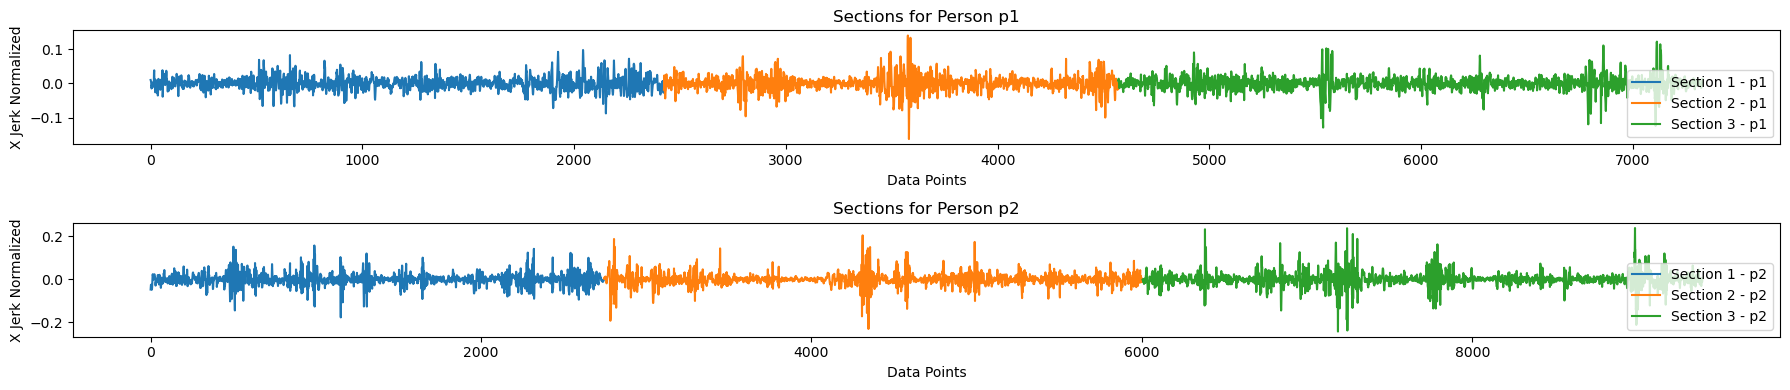

In [207]:
# Extract the data for person p1
p1_section1 = acc_dict['p1']['section_1_x_jerk_normalized_global']
p1_section2 = acc_dict['p1']['section_2_x_jerk_normalized_global']
p1_section3 = acc_dict['p1']['section_3_x_jerk_normalized_global']

# Extract the data for person p2
p2_section1 = acc_dict['p2']['section_1_x_jerk_normalized_global']
p2_section2 = acc_dict['p2']['section_2_x_jerk_normalized_global']
p2_section3 = acc_dict['p2']['section_3_x_jerk_normalized_global']

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 4))

# Plot data for person p1
ax1.plot(p1_section1, label='Section 1 - p1')
ax1.plot(p1_section2, label='Section 2 - p1')
ax1.plot(p1_section3, label='Section 3 - p1')
ax1.set_title('Sections for Person p1')
ax1.set_xlabel('Data Points')
ax1.set_ylabel('X Jerk Normalized')
ax1.legend()

# Plot data for person p2
ax2.plot(p2_section1, label='Section 1 - p2')
ax2.plot(p2_section2, label='Section 2 - p2')
ax2.plot(p2_section3, label='Section 3 - p2')
ax2.set_title('Sections for Person p2')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('X Jerk Normalized')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [208]:
jerk_values = {'section_1_x': {}, 'section_1_y': {}, 'section_1_z': {}, 'section_1_vector': {}, 'section_2_x': {}, 'section_2_y': {}, 'section_2_z': {}, 'section_2_vector': {}, 'section_3_x': {}, 'section_3_y': {}, 'section_3_z': {}, 'section_3_vector': {}}

for person_name in acc_dict:
    acc_dataset = acc_dict[person_name]
    section_dataset = section_dict[person_name]
    time = acc_dataset['time']
    time_1 = section_dataset['time_1']
    time_2 = section_dataset['time_2']
    time_3 = section_dataset['time_3']
    start_section_2 = len(time_1) + 1
    start_section_3 = len(time_1) + len(time_2) + 1
    
    for axis in ['x', 'y', 'z', 'vector']:
        section1 = acc_dataset[f'section_1_{axis}_jerk_normalized_global'][0:len(time_1)]
        section2 = acc_dataset[f'section_2_{axis}_jerk_normalized_global'][start_section_2  : start_section_3]
        section3 = acc_dataset[f'section_3_{axis}_jerk_normalized_global'][start_section_3 : len(time_1) + len(time_2) + len(time_3) + 1]
        
        # Integrate 
        integral_value_1 = trapz(np.abs(section1), time_1)
        integral_value_2 = trapz(np.abs(section2), time_2)
        integral_value_3 = trapz(np.abs(section3), time_3)
        mean_jerk_1 = (1 / len(time_1)) * integral_value_1
        mean_jerk_2 = (1 / len(time_2)) * integral_value_2
        mean_jerk_3 = (1 / len(time_3)) * integral_value_3

        jerk_values[f'section_1_{axis}'][person_name] = mean_jerk_1
        jerk_values[f'section_2_{axis}'][person_name] = mean_jerk_2
        jerk_values[f'section_3_{axis}'][person_name] = mean_jerk_3

print(jerk_values)

{'section_1_x': {'p1': 0.013926855909873742, 'p2': 0.018313109079919156, 'p3': 0.022554464291304747, 'p4': 0.019889769742561587, 'p5': 0.020265177816644116, 'p6': 0.022243691247305013, 'p7': 0.02509812375237173, 'p8': 0.015207762085973393, 'p9': 0.02070524091430302, 'p10': 0.023112210850086776, 'p11': 0.02047739326703174, 'p12': 0.01993426539116153, 'p13': 0.02505663616767379, 'p14': 0.020869031945410618, 'p15': 0.01144798113672498, 'p16': 0.012691629522122725, 'p17': 0.01717161846933362, 'p18': 0.015607814875482674}, 'section_1_y': {'p1': 0.0162847952710152, 'p2': 0.022300886373901607, 'p3': 0.02305575322597627, 'p4': 0.019638134974402772, 'p5': 0.016471526920320882, 'p6': 0.02260369610828382, 'p7': 0.021734450726271965, 'p8': 0.012476889362618796, 'p9': 0.022053550318596394, 'p10': 0.02278140406392317, 'p11': 0.019438290955144277, 'p12': 0.019683278050182745, 'p13': 0.027397903839546964, 'p14': 0.023015421239128284, 'p15': 0.010453028688534633, 'p16': 0.016264020211926803, 'p17': 0.0

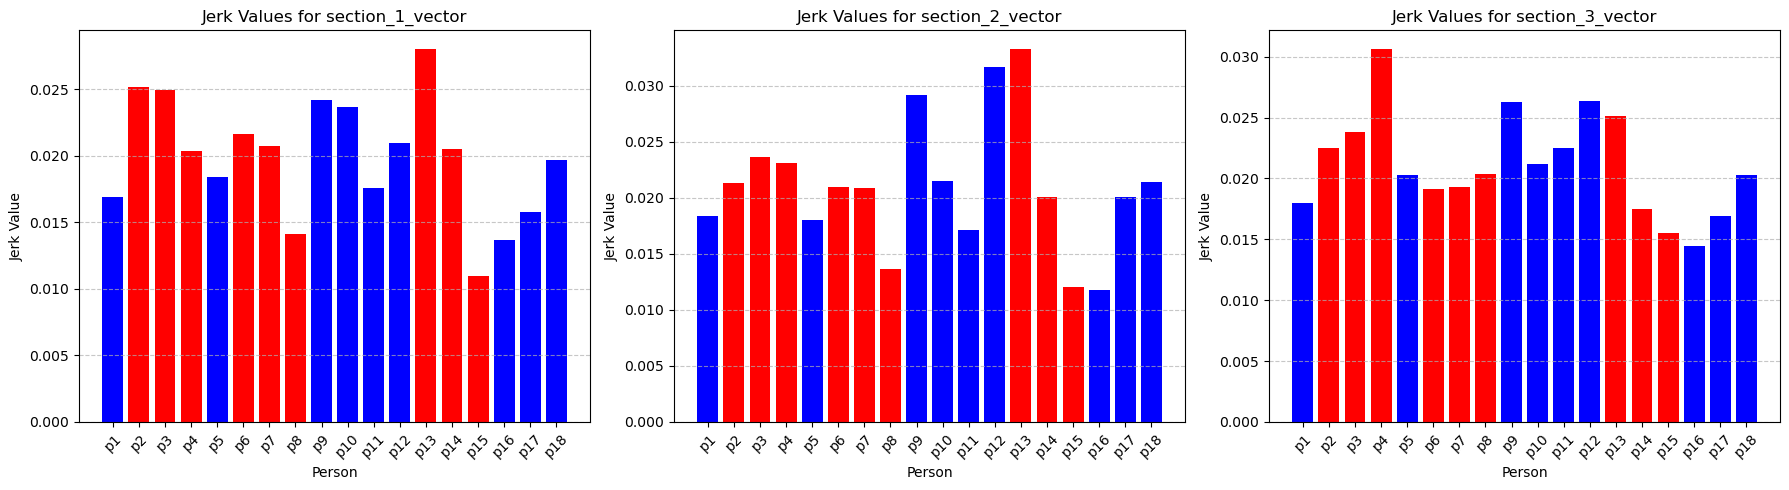

In [210]:
axes = ['section_1_vector', 'section_2_vector', 'section_3_vector']

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, axis in enumerate(axes):
    person_names = list(jerk_values[axis].keys())
    values = list(jerk_values[axis].values())
    genders = [acc_dict[person_name]['gender'] for person_name in person_names]
    
    # Define colors based on gender
    colors = ['red' if gender == 'female' else 'blue' for gender in genders]
    
    # Plot the integrated values with colors
    axs[i].bar(person_names, values, color=colors)
    axs[i].set_xlabel('Person')
    axs[i].set_ylabel('Jerk Value')
    axs[i].set_title(f'Jerk Values for {axis}')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()